In [1]:
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from simple import nmf_son
from sklearn.decomposition import NMF
from mpl_toolkits.axes_grid1 import make_axes_locatable


np.random.seed(42)
np.set_printoptions(precision=3)

In [2]:
def normalized_similarity(W_ins):
    r = W_ins.shape[1]
    res = np.ones(shape=(r, r)) * -1
    for i in range(r):
        for j in range(r):
            res[i, j] = np.linalg.norm(W_ins[:, i] - W_ins[:, j])
        res[i, :] = res[i, :] / sum(res[i, :])
    return res

def plot_scores(fscores, gscores, lambda_vals):
    def plot_ax(ax, f, g, total):
        ax.plot(total, color='black', linewidth=3, label='total')
        ax.plot(f, label='f')
        ax.plot(g, label='g')
        ax.legend()

    total_score = fscores + lambda_vals * gscores
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))

    plot_ax(axs[0], fscores, gscores, total_score)

    axs[1].set_yscale('log')
    plot_ax(axs[1], fscores, gscores, total_score)

    axs[2].set_yscale('log')
    plot_ax(axs[2], fscores - fscores[-1], gscores - gscores[-1], total_score - total_score[-1])

In [3]:
mat = scipy.io.loadmat('urban/Urban.mat')
X = mat['X']

m, n = X.shape # (162, 94249)
num_col = int(math.sqrt(n)) # 307

X3d = X.reshape(m, num_col, num_col, order='F')

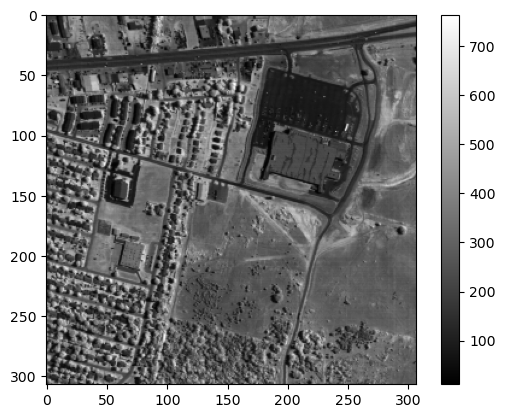

In [4]:
wavelength = 80
plt.imshow(X3d[wavelength, :, :], cmap='gray')
plt.colorbar()

### Small dataset

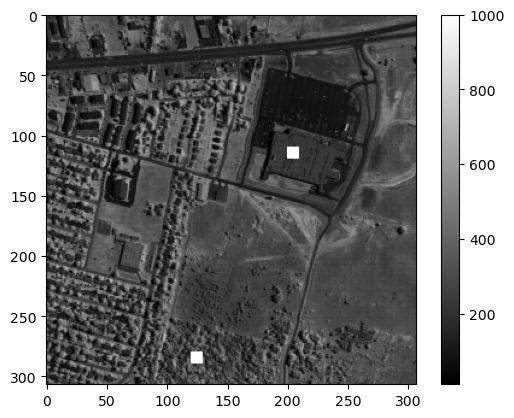

In [5]:
img = X3d[wavelength, :, :].copy()
img[280: 290, 120: 130] = 1000 # trees
img[110: 120, 200: 210] = 1000 # roof
plt.imshow(img, cmap='gray')
plt.colorbar()

In [6]:
trees3d = X3d[:, 280: 290, 120: 130] # (162, 10, 10)
roof3d = X3d[:, 110: 120, 200: 210] # (162, 10, 10)

smallX3d = np.hstack([trees3d, roof3d]) # (162, 20, 10)

smallX = smallX3d.reshape(m, -1, order='F') # (162, 200)

with open(f'urban/2022_11_17/small/X.npz', 'wb') as fout:
    np.savez_compressed(fout, X=smallX)

In [7]:
# rank = 6
# m, n = smallX.shape
#
# iniW = np.random.rand(m, rank)
# iniH = np.random.rand(rank, n)

In [8]:
# reg = 2
# iterations = 100
#
# Wb, Hb, Wl, Hl, fscores, gscores, lambda_vals = nmf_son(smallX, iniW.copy(), iniH.copy(), _lambda=reg, itermax=iterations, scale_lambda=True, verbose=True)

In [9]:
# plot_scores(fscores, gscores, lambda_vals)

In [10]:
# img_size = (20, 10)
# fig, axs = plt.subplots(3, rank, figsize=(20, 10), sharey='row')
#
# for idx in range(rank):
#     axs[0, idx].plot(Wl[:, idx] / np.dot(Wl[:, idx], Wl[:, idx]))
#     h_idx_3d = Hl[idx, :].reshape(img_size, order='F')
#     axs[1, idx].plot(h_idx_3d)
#
#     axs[2, idx].imshow(h_idx_3d)
#
#     img = axs[2, idx].imshow(h_idx_3d, cmap='gray')
#     divider = make_axes_locatable(axs[2, idx])
#     cax = divider.append_axes('right', size='5%', pad=0.1)
#     fig.colorbar(img, cax=cax, orientation='vertical')

In [11]:
# normalized_similarity(Wl)

### Andersen's suggestion

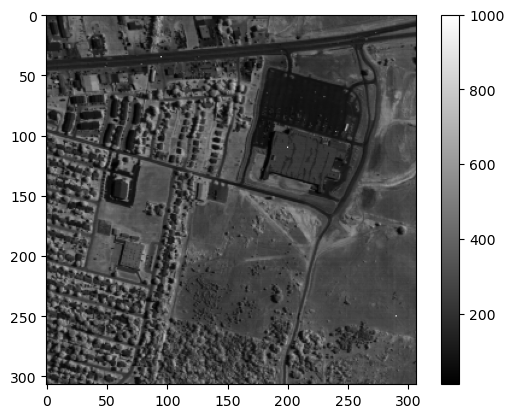

In [12]:
img = X3d[wavelength, :, :].copy()
img[35: 36, 95: 96] = 1000 # asphalt
img[250: 251, 290: 291] = 1000 # grass
img[110: 111, 200: 201] = 1000 # roof
plt.imshow(img, cmap='gray')
plt.colorbar()

In [13]:
asphalt_pt = X3d[:, 35: 36, 95: 96].reshape(m, -1, order='F') # asphalt
grass_pt = X3d[:, 250: 251, 290: 291].reshape(m, -1, order='F') # grass
roof_pt = X3d[:, 110: 111, 200: 201].reshape(m, -1, order='F') # roof
W_true = np.hstack([asphalt_pt, grass_pt, roof_pt]) # (162, 20, 10)

rank_true = W_true.shape[1]
n = 8
H_true = np.random.rand(rank_true, n)
H_true = H_true / H_true.sum(axis=0)

M = W_true @ H_true

with open(f'urban/2022_11_17/custom/X_gt.npz', 'wb') as fout:
    np.savez_compressed(fout, X=M, W=W_true, H=H_true)

In [14]:
# rank = 6
# m, n = M.shape
#
# iniW = np.random.rand(m, rank)
# iniH = np.random.rand(rank, n)

In [15]:
# reg = 2
# iterations = 100
#
# Wb, Hb, Wl, Hl, fscores, gscores, lambda_vals = nmf_son(M, iniW.copy(), iniH.copy(), _lambda=reg, itermax=iterations, scale_lambda=True, verbose=True)

In [16]:
# plot_scores(fscores, gscores, lambda_vals)

In [17]:
# img_size = (20, 10)
# fig, axs = plt.subplots(2, rank, figsize=(20, 10), sharey='row')
#
# for idx in range(rank):
#     axs[0, idx].plot(Wl[:, idx] / np.dot(Wl[:, idx], Wl[:, idx]))
#     axs[1, idx].plot(Hl[idx, :])

In [18]:
# normalized_similarity(Wl)

### New small dataset

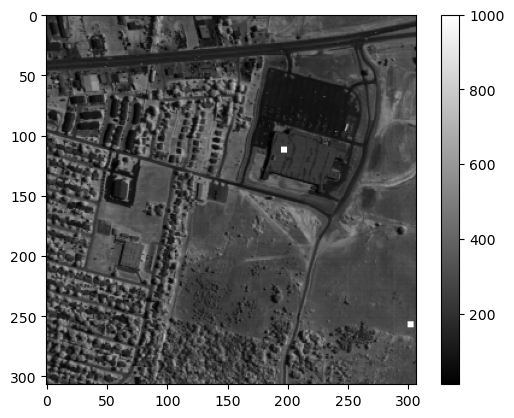

In [19]:
img = X3d[wavelength, :, :].copy()
img[255: 260, 300: 305] = 1000 # trees
img[110: 115, 195: 200] = 1000 # roof
plt.imshow(img, cmap='gray')
plt.colorbar()

In [20]:
trees3d = X3d[:, 255: 260, 300: 305] # (162, 10, 10)
roof3d = X3d[:, 110: 115, 195: 200] # (162, 10, 10)

smallX3d = np.hstack([trees3d, roof3d]) # (162, 20, 10)

smallX = smallX3d.reshape(m, -1, order='F') # (162, 200)
with open(f'urban/2022_11_17/smaller/X.npz', 'wb') as fout:
    np.savez_compressed(fout, X=smallX)

In [21]:
# rank = 6
# m, n = smallX.shape
#
# iniW = np.random.rand(m, rank)
# iniH = np.random.rand(rank, n)

In [22]:
# reg = 2
# iterations = 100
#
# Wb, Hb, Wl, Hl, fscores, gscores, lambda_vals = nmf_son(smallX, iniW.copy(), iniH.copy(), _lambda=reg, itermax=iterations, scale_lambda=True, verbose=True)

In [23]:
# plot_scores(fscores, gscores, lambda_vals)

In [24]:
# img_size = (10, 5)
# fig, axs = plt.subplots(3, rank, figsize=(20, 10), sharey='row')
#
# for idx in range(rank):
#     axs[0, idx].plot(Wl[:, idx] / np.dot(Wl[:, idx], Wl[:, idx]))
#     h_idx_3d = Hl[idx, :].reshape(img_size, order='F')
#     axs[1, idx].plot(h_idx_3d)
#
#     axs[2, idx].imshow(h_idx_3d)
#
#     img = axs[2, idx].imshow(h_idx_3d, cmap='gray')
#     divider = make_axes_locatable(axs[2, idx])
#     cax = divider.append_axes('right', size='5%', pad=0.1)
#     fig.colorbar(img, cax=cax, orientation='vertical')

In [25]:
# normalized_similarity(Wl)

In [26]:
currX = np.load('urban/2022_11_17/custom/X_gt.npz')['X']
m, n = currX.shape

ranks = [6, 8]
regs = [0.05, 0.25, 0.5, 1, 2, 10, 100]
it_ckpts = [200, 500, 1000, 2000, 3000, 4000, 5000]


save_filepath = 'urban/2022_11_17/custom/r{}-l{}-it{}.npz'

for rank in ranks:
    iniW = np.random.rand(m, rank)
    iniH = np.random.rand(rank, n)
    with open(f'urban/2022_11_17/custom/r{rank}_ini.npz', 'wb') as fout:
        np.savez_compressed(fout, W=iniW, H=iniH)

    for reg_val in regs:

        Wb, Hb, Wl, Hl, fscores, gscores, lambda_vals = nmf_son(currX, iniW.copy(), iniH.copy(), _lambda=reg_val, itermax=it_ckpts[0], scale_lambda=True)
        with open(save_filepath.format(rank, reg_val, it_ckpts[0]), 'wb') as fout:
            np.savez_compressed(fout, Wb=Wb, Hb=Hb, Wl=Wl, Hl=Hl, fscores=fscores, gscores=gscores, lambda_vals=lambda_vals)

        for k in range(1, len(it_ckpts)):
            Wb, Hb, Wl, Hl, new_fscores, new_gscores, new_lambda_vals = nmf_son(currX, Wl, Hl, _lambda=reg_val, itermax=it_ckpts[k] - it_ckpts[k-1], scale_lambda=True)

            fscores = np.append(fscores[:-1], new_fscores)
            gscores = np.append(gscores[:-1], new_gscores)
            lambda_vals = np.append(lambda_vals[:-1], new_lambda_vals)

            with open(save_filepath.format(rank, reg_val, it_ckpts[k]), 'wb') as fout:
                np.savez_compressed(fout, Wb=Wb, Hb=Hb, Wl=Wl, Hl=Hl, fscores=fscores, gscores=gscores, lambda_vals=lambda_vals)
            print(rank, reg_val, it_ckpts[k], 'complete')

NameError: name 'Wb' is not defined

In [ ]:
currX = np.load('urban/2022_11_17/custom/X_gt.npz')['X']
m, n = currX.shape

ranks = [6, 8]
regs = [0.05, 0.25, 0.5, 1, 2, 10, 100]
it_ckpts = [200, 500, 1000, 2000, 3000, 4000, 5000]


save_filepath = 'urban/2022_11_17/custom/r{}-l{}-it{}.npz'

for rank in ranks:
    iniW = np.random.rand(m, rank)
    iniH = np.random.rand(rank, n)
    with open(f'urban/2022_11_17/custom/r{rank}_ini.npz', 'wb') as fout:
        np.savez_compressed(fout, W=iniW, H=iniH)

    for reg_val in regs:

        Wb, Hb, Wl, Hl, fscores, gscores, lambda_vals = nmf_son(currX, iniW.copy(), iniH.copy(), _lambda=reg_val, itermax=it_ckpts[0], scale_lambda=True)
        with open(save_filepath.format(rank, reg_val, it_ckpts[0]), 'wb') as fout:
            np.savez_compressed(fout, Wb=Wb, Hb=Hb, Wl=Wl, Hl=Hl, fscores=fscores, gscores=gscores, lambda_vals=lambda_vals)

        for k in range(1, len(it_ckpts)):
            Wb, Hb, Wl, Hl, new_fscores, new_gscores, new_lambda_vals = nmf_son(currX, Wl, Hl, _lambda=reg_val, itermax=it_ckpts[k] - it_ckpts[k-1], scale_lambda=True)

            fscores = np.append(fscores[:-1], new_fscores)
            gscores = np.append(gscores[:-1], new_gscores)
            lambda_vals = np.append(lambda_vals[:-1], new_lambda_vals)

            with open(save_filepath.format(rank, reg_val, it_ckpts[k]), 'wb') as fout:
                np.savez_compressed(fout, Wb=Wb, Hb=Hb, Wl=Wl, Hl=Hl, fscores=fscores, gscores=gscores, lambda_vals=lambda_vals)
            print(rank, reg_val, it_ckpts[k], 'complete')

In [ ]:
currX = np.load('urban/2022_11_17/smaller/X.npz')['X']
m, n = currX.shape

ranks = [6, 8]
regs = [0.05, 0.25, 0.5, 1, 2, 10, 100]
it_ckpts = [200, 500, 1000, 2000, 3000, 4000, 5000]


save_filepath = 'urban/2022_11_17/smaller/r{}-l{}-it{}.npz'

for rank in ranks:
    iniW = np.random.rand(m, rank)
    iniH = np.random.rand(rank, n)
    with open(f'urban/2022_11_17/smaller/r{rank}_ini.npz', 'wb') as fout:
        np.savez_compressed(fout, W=iniW, H=iniH)

    for reg_val in regs:

        Wb, Hb, Wl, Hl, fscores, gscores, lambda_vals = nmf_son(currX, iniW.copy(), iniH.copy(), _lambda=reg_val, itermax=it_ckpts[0], scale_lambda=True)
        with open(save_filepath.format(rank, reg_val, it_ckpts[0]), 'wb') as fout:
            np.savez_compressed(fout, Wb=Wb, Hb=Hb, Wl=Wl, Hl=Hl, fscores=fscores, gscores=gscores, lambda_vals=lambda_vals)

        for k in range(1, len(it_ckpts)):
            Wb, Hb, Wl, Hl, new_fscores, new_gscores, new_lambda_vals = nmf_son(currX, Wl, Hl, _lambda=reg_val, itermax=it_ckpts[k] - it_ckpts[k-1], scale_lambda=True)

            fscores = np.append(fscores[:-1], new_fscores)
            gscores = np.append(gscores[:-1], new_gscores)
            lambda_vals = np.append(lambda_vals[:-1], new_lambda_vals)

            with open(save_filepath.format(rank, reg_val, it_ckpts[k]), 'wb') as fout:
                np.savez_compressed(fout, Wb=Wb, Hb=Hb, Wl=Wl, Hl=Hl, fscores=fscores, gscores=gscores, lambda_vals=lambda_vals)
            print(rank, reg_val, it_ckpts[k], 'complete')

In [ ]:
currX = np.load('urban/2022_11_17/small/X.npz')['X']
m, n = currX.shape

ranks = [6, 8]
regs = [0.05, 0.25, 0.5, 1, 2, 10, 100]
it_ckpts = [200, 500, 1000, 2000, 3000, 4000, 5000]


save_filepath = 'urban/2022_11_17/small/r{}-l{}-it{}.npz'

for rank in ranks:
    iniW = np.random.rand(m, rank)
    iniH = np.random.rand(rank, n)
    with open(f'urban/2022_11_17/small/r{rank}_ini.npz', 'wb') as fout:
        np.savez_compressed(fout, W=iniW, H=iniH)

    for reg_val in regs:

        Wb, Hb, Wl, Hl, fscores, gscores, lambda_vals = nmf_son(currX, iniW.copy(), iniH.copy(), _lambda=reg_val, itermax=it_ckpts[0], scale_lambda=True)
        with open(save_filepath.format(rank, reg_val, it_ckpts[0]), 'wb') as fout:
            np.savez_compressed(fout, Wb=Wb, Hb=Hb, Wl=Wl, Hl=Hl, fscores=fscores, gscores=gscores, lambda_vals=lambda_vals)

        for k in range(1, len(it_ckpts)):
            Wb, Hb, Wl, Hl, new_fscores, new_gscores, new_lambda_vals = nmf_son(currX, Wl, Hl, _lambda=reg_val, itermax=it_ckpts[k] - it_ckpts[k-1], scale_lambda=True)

            fscores = np.append(fscores[:-1], new_fscores)
            gscores = np.append(gscores[:-1], new_gscores)
            lambda_vals = np.append(lambda_vals[:-1], new_lambda_vals)

            with open(save_filepath.format(rank, reg_val, it_ckpts[k]), 'wb') as fout:
                np.savez_compressed(fout, Wb=Wb, Hb=Hb, Wl=Wl, Hl=Hl, fscores=fscores, gscores=gscores, lambda_vals=lambda_vals)
            print(rank, reg_val, it_ckpts[k], 'complete')